<div style="background: #0E365B; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='b3d8fa' size=5> 
    <b>Комментарий студента:</b>
<font color='b3d8fa' size=3><br> 
Александр, привет! Спасибо за твои коментарии и советы

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [88]:
! pip install networkx

In [89]:
! pip install --upgrade networkx[default]

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import re
import networkx as nx
import warnings
import statsmodels

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import timedelta
from time import perf_counter
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.dummy import DummyRegressor

# Для воспроизводимости результатов
seed = 1234
np.random.seed(seed)
print(f'{statsmodels.__version__ = }')
warnings.filterwarnings("ignore")

statsmodels.__version__ = '0.13.2'


In [91]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except:
    data_train = pd.read_csv(r'C:\Users\Barbos-Rapitos\Desktop\practicum\overall project_2\gold_recovery_train_new.csv')
    
try:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')    
except:
    data_test = pd.read_csv(r'C:\Users\Barbos-Rapitos\Desktop\practicum\overall project_2\gold_recovery_test_new.csv')
    
try:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    data_full = pd.read_csv(r'C:\Users\Barbos-Rapitos\Desktop\practicum\overall project_2\gold_recovery_full_new.csv')

In [92]:
display(data_train.info())
display(data_test.info())
display(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

In [94]:
display(data_train.head(3))
display(data_test.head(3))
display(data_full.head(3))

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 14.151341   
1                                 13.998353   
2                                 14.028663   

   secondary_cleaner.state.floatbank6_a_level  
0                                 -605.841980  
1                                 -599.787184  
2                                 -601.427363  

[3 rows x 87 columns]

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 12.023554   
1                                 12.058140   
2                                 11.962366   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -497.795834   
1                                 -498.695773   
2                                 -498.767484   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  4.872511   
1                                  4.878850   
2                                  4.905125   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.037437   
1                                 -500.162375   
2                                 -499.828510   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 26.705889   
1                                 25.019940   
2                                 24.994862   

   secondary_cleaner.state.floatbank6_a_level  
0                                 -499.709414  
1                                 -499.819438  
2                                 -500.622559  

[3 rows x 53 columns]

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 14.151341   
1                                 13.998353   
2                                 14.028663   

   secondary_cleaner.state.floatbank6_a_level  
0                                 -605.841980  
1                                 -599.787184  
2                                 -601.427363  

[3 rows x 87 columns]

1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между вашими расчётами и значением признака. Опишем выводы.

In [96]:
data_train.columns.unique()

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [97]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [98]:
data_train.duplicated().sum()

0

rougher.output.recovery

In [99]:
recovery = (data_train['rougher.output.concentrate_au'] *\
    (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) /\
        (data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])) * 100
        
mean_absolute_error(recovery, data_train['rougher.output.recovery'])        

9.73512347450521e-15

Ошибка незначительная. Параметр rougher.output.recovery расчитан правильно.

In [100]:
columns_not_in_test = []
for i in data_train.columns:
    if i not in data_test.columns:
        columns_not_in_test.append(i)
columns_not_in_test
        

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке почти для всех этапов нет следующих название_параметра для тип_параметра output:
* concentrate_ag
* concentrate_pb
* concentrate_sol
* concentrate_au    
* tail_ag
* tail_pb
* tail_sol
* tail_au

кроме этапа secondary_cleaner, в котором присутствуют название_параметра:

* concentrate_ag
* concentrate_pb
* concentrate_sol
* concentrate_au 

Нет двух целевых признаков:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Нет посчитанных параметров:
* rougher.calculation.sulfate_to_au_concentrate
* rougher.calculation.floatbank10_sulfate_to_au_feed
* rougher.calculation.floatbank11_sulfate_to_au_feed
* rougher.calculation.au_pb_ratio

In [101]:
data_full.columns.unique()

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Вытянем целевые признаки в тестовую выборку, по привязке к дате.

In [102]:
data_test=data_test.merge(data_full[['final.output.recovery', 'rougher.output.recovery', 'date']], how='left', on='date')

Наши модели должны по характеристикам сырья, показателям разных добавок и т.п. предсказывать выход (коэффициент обогащения после этапа флотации и финальной очистки). А отсутствующие столбцы и калькуляции в тестовой выборке несут как раз информацию о выходе и будут утечкой данных, если их включить в признаки. Поэтому удалим эти столбцы из тренеровочного датасета

In [103]:
data_train.shape

(14149, 87)

In [104]:
data_train.loc[
              (data_train['rougher.input.feed_ag'] == data_train['rougher.input.feed_au']) &
              (data_train['rougher.input.feed_au'] == data_train['rougher.input.feed_pb'])] 

date  final.output.concentrate_ag  \
10936  2018-03-12 02:59:59                     5.413548   
10937  2018-03-12 03:59:59                     5.413548   
10938  2018-03-12 04:59:59                     5.413548   
10939  2018-03-12 05:59:59                     5.413548   
10940  2018-03-12 06:59:59                     4.238007   

       final.output.concentrate_pb  final.output.concentrate_sol  \
10936                     9.389648                      8.731319   
10937                     9.389648                      8.731319   
10938                     9.389648                      8.731319   
10939                     9.389648                      8.731319   
10940                     7.349108                      6.833999   

       final.output.concentrate_au  final.output.recovery  \
10936                    45.270618                  100.0   
10937                    45.270618                  100.0   
10938                    45.270618                  100.0   
10939                    45.270618                  100.0   
10940                    35.424183                  100.0   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
10936                   0.0                   0.0                    0.0   
10937                   0.0                   0.0                    0.0   
10938                   0.0                   0.0                    0.0   
10939                   0.0                   0.0                    0.0   
10940                   0.0                   0.0                    0.0   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
10936                   0.0  ...                                 22.999183   
10937                   0.0  ...                                 22.985096   
10938                   0.0  ...                                 22.953466   
10939                   0.0  ...                                 22.953502   
10940                   0.0  ...                                 22.951054   

       secondary_cleaner.state.floatbank4_a_level  \
10936                                 -503.125579   
10937                                 -498.720702   
10938                                 -499.747605   
10939                                 -502.064254   
10940                                 -498.925902   

       secondary_cleaner.state.floatbank4_b_air  \
10936                                 14.941823   
10937                                 14.934058   
10938                                 14.926294   
10939                                 14.918529   
10940                                 14.910765   

       secondary_cleaner.state.floatbank4_b_level  \
10936                                 -500.352978   
10937                                 -499.661417   
10938                                 -500.058041   
10939                                 -500.135286   
10940                                 -499.608297   

       secondary_cleaner.state.floatbank5_a_air  \
10936                                 17.987796   
10937                                 17.998973   
10938                                 18.055831   
10939                                 17.995171   
10940                                 17.954160   

       secondary_cleaner.state.floatbank5_a_level  \
10936                                 -500.438815   
10937                                 -500.156797   
10938                                 -500.061594   
10939                                 -500.481962   
10940                                 -499.576610   

       secondary_cleaner.state.floatbank5_b_air  \
10936                                 11.963555   
10937                                 12.035195   
10938                                 12.014652   
10939                                 11.988193   
10940                                 12.017173   

       secondary_cleaner.state.floatbank5_b_level  \
10936                             

In [105]:
# в ходе анализа данных выявились подозрительные, равные друг другу, околонулевые значения веществ. Избавимся от этих записей на этом этапе

data_train = data_train.loc[
              (data_train['rougher.output.concentrate_au'] != data_train['rougher.output.concentrate_ag']) |
              (data_train['rougher.output.concentrate_ag'] != data_train['rougher.output.concentrate_pb'])] 

data_train = data_train.loc[
              (data_train['primary_cleaner.output.concentrate_au'] != data_train['primary_cleaner.output.concentrate_ag']) |
              (data_train['primary_cleaner.output.concentrate_ag'] != data_train['primary_cleaner.output.concentrate_pb'])] 
                  
data_train = data_train.loc[
              (data_train['final.output.concentrate_au'] != data_train['final.output.concentrate_ag']) |
              (data_train['final.output.concentrate_ag'] != data_train['final.output.concentrate_pb'])]                

data_train.shape

(13602, 87)

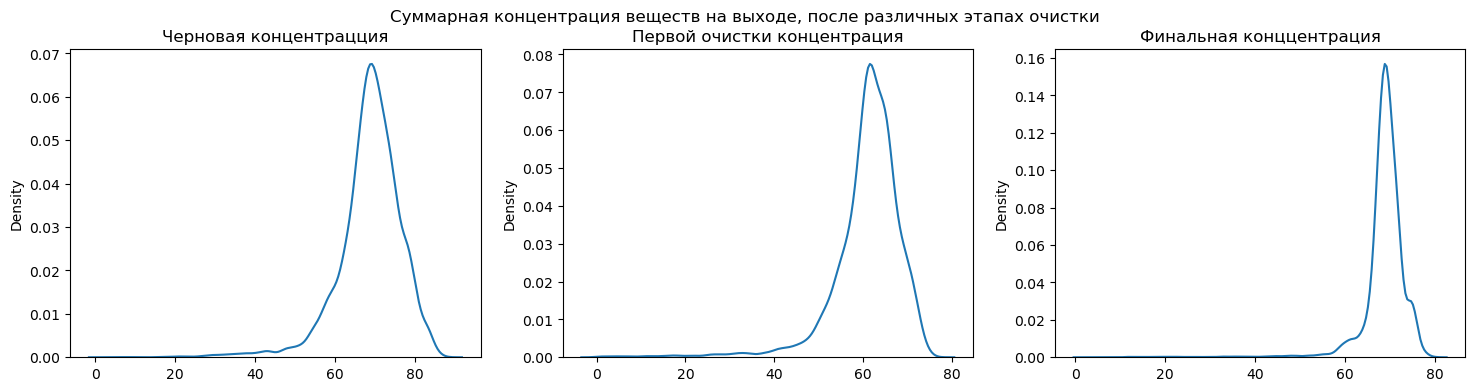

In [106]:
plt.rcParams['figure.figsize'] = (18,4)
fig, ax = plt.subplots(1,3)
sns.kdeplot(data=data_train[[x for x in data_train.columns if 'rougher.output.concentrate' in x]].sum(axis=1), ax=ax[0])
sns.kdeplot(data=data_train[[x for x in data_train.columns if 'primary_cleaner.output.concentrate' in x]].sum(axis=1), ax=ax[1])
sns.kdeplot(data=data_train[[x for x in data_train.columns if 'final.output.concentrate' in x]].sum(axis=1), ax=ax[2])
ax[0].set_title('Черновая концентрацция'), ax[1].set_title('Первой очистки концентрация'), ax[2].set_title('Финальная конццентрация')
plt.suptitle ('Суммарная концентрация веществ на выходе после различных этапах очистки')
fig.show()

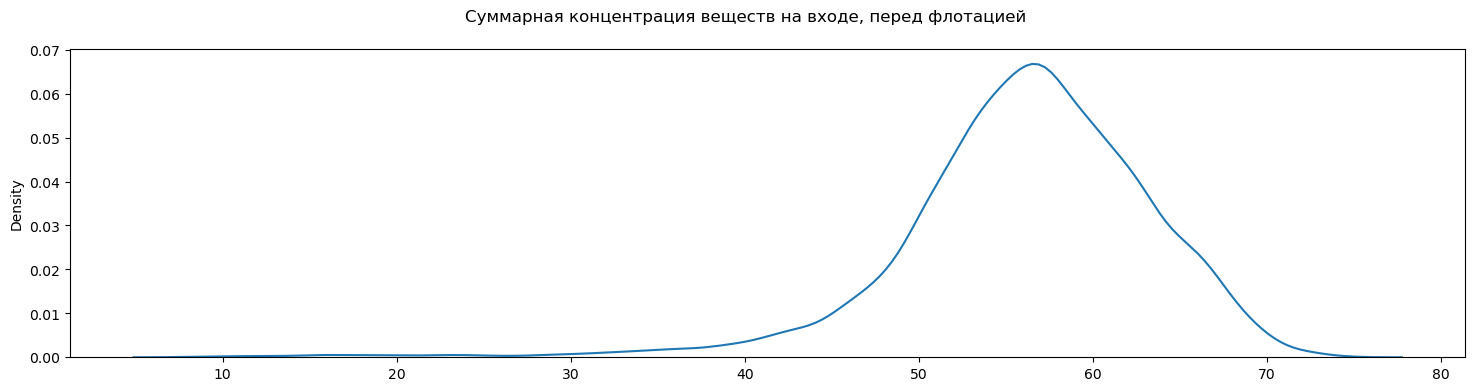

In [107]:
plt.rcParams['figure.figsize'] = (18,4)
sns.kdeplot(data=data_train[[x for x in data_train.columns if 'rougher.input.feed' in x and 'rate' not in x and 'size' not in x]].sum(axis=1))
plt.suptitle ('Суммарная концентрация веществ на входе перед флотацией')
fig.show()

In [108]:
data_train.loc[
              (data_train['rougher.input.feed_ag'] == data_train['rougher.input.feed_au']) &
              (data_train['rougher.input.feed_au'] == data_train['rougher.input.feed_pb'])] 

Empty DataFrame
Columns: [date, final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.calculation.sulfate_to_au_concentrate, rougher.calculation.floatbank10_sulfate_to_au_feed, rougher.calculation.floatbank11_sulfate_to_au_feed, rougher.calculation.au_pb_ratio, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_sol, rougher.output.concentrate_au, rougher.output.recovery, rougher.output.tail_ag, rougher.output.tail_pb, rougher.output.tail_sol, rougher.output.tail_au, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, secondary_cleaner.output.tail_sol, secondary_cleaner.output.tail_au, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level]
Index: []

[0 rows x 87 columns]

После удаления этиз выбросов, удалось достигнуть увеличения итоговой sMAPE на тестовой ввыборке

<AxesSubplot:>

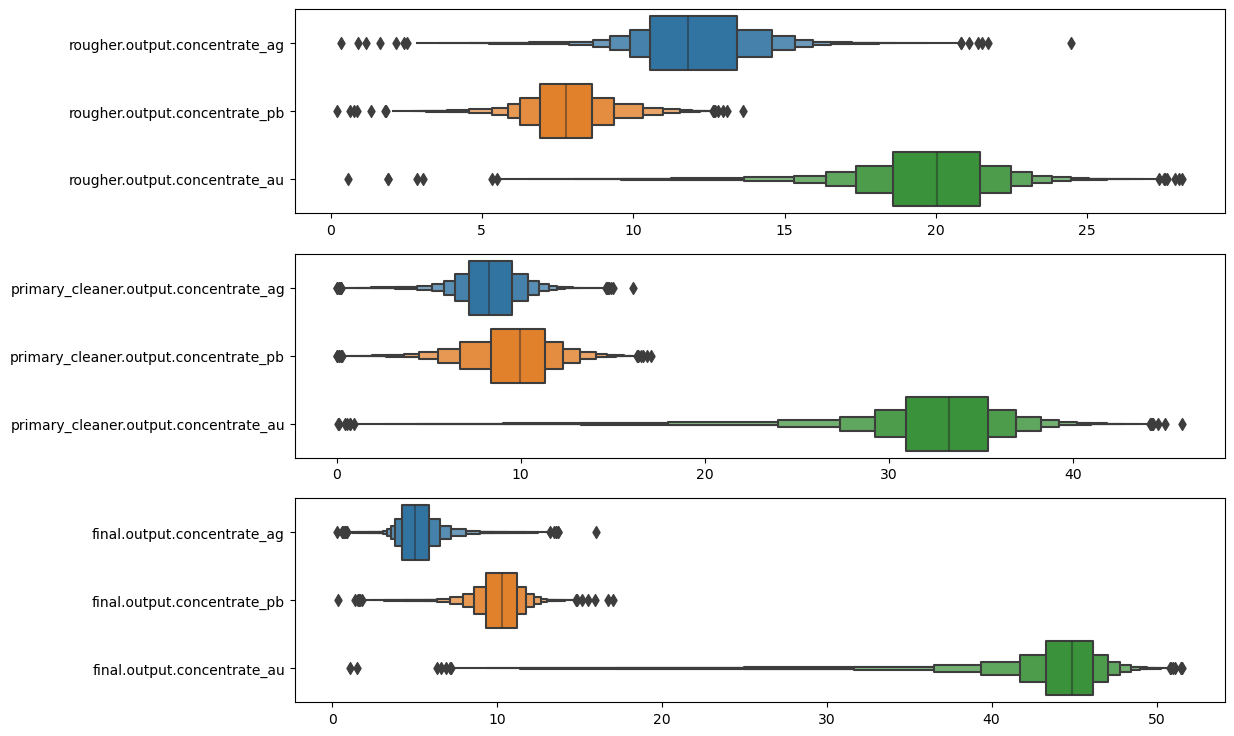

In [109]:
plt.rcParams['figure.figsize'] = (12,9)
fig, ax = plt.subplots(3,1)
sns.boxenplot(data=data_train[[x for x in data_train.columns if 'rougher.output.concentrate' in x and 'sol' not in x]], orient='h', ax=ax[0])
sns.boxenplot(data=data_train[[x for x in data_train.columns if 'primary_cleaner.output.concentrate' in x and 'sol' not in x]], orient='h', ax=ax[1])
sns.boxenplot(data=data_train[[x for x in data_train.columns if 'final.output.concentrate' in x and 'sol' not in x]], orient='h', ax=ax[2])

In [110]:
data_train = data_train[data_test.columns]

In [111]:
data_train.shape, data_test.shape

((13602, 55), (5290, 55))

In [112]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [113]:
data_train.isna().sum()

date                                            0
primary_cleaner.input.sulfate                   5
primary_cleaner.input.depressant               17
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                 85
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                          68
rougher.input.feed_rate                         8
rougher.input.feed_size                       138
rougher.input.feed_sol                         62
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              19


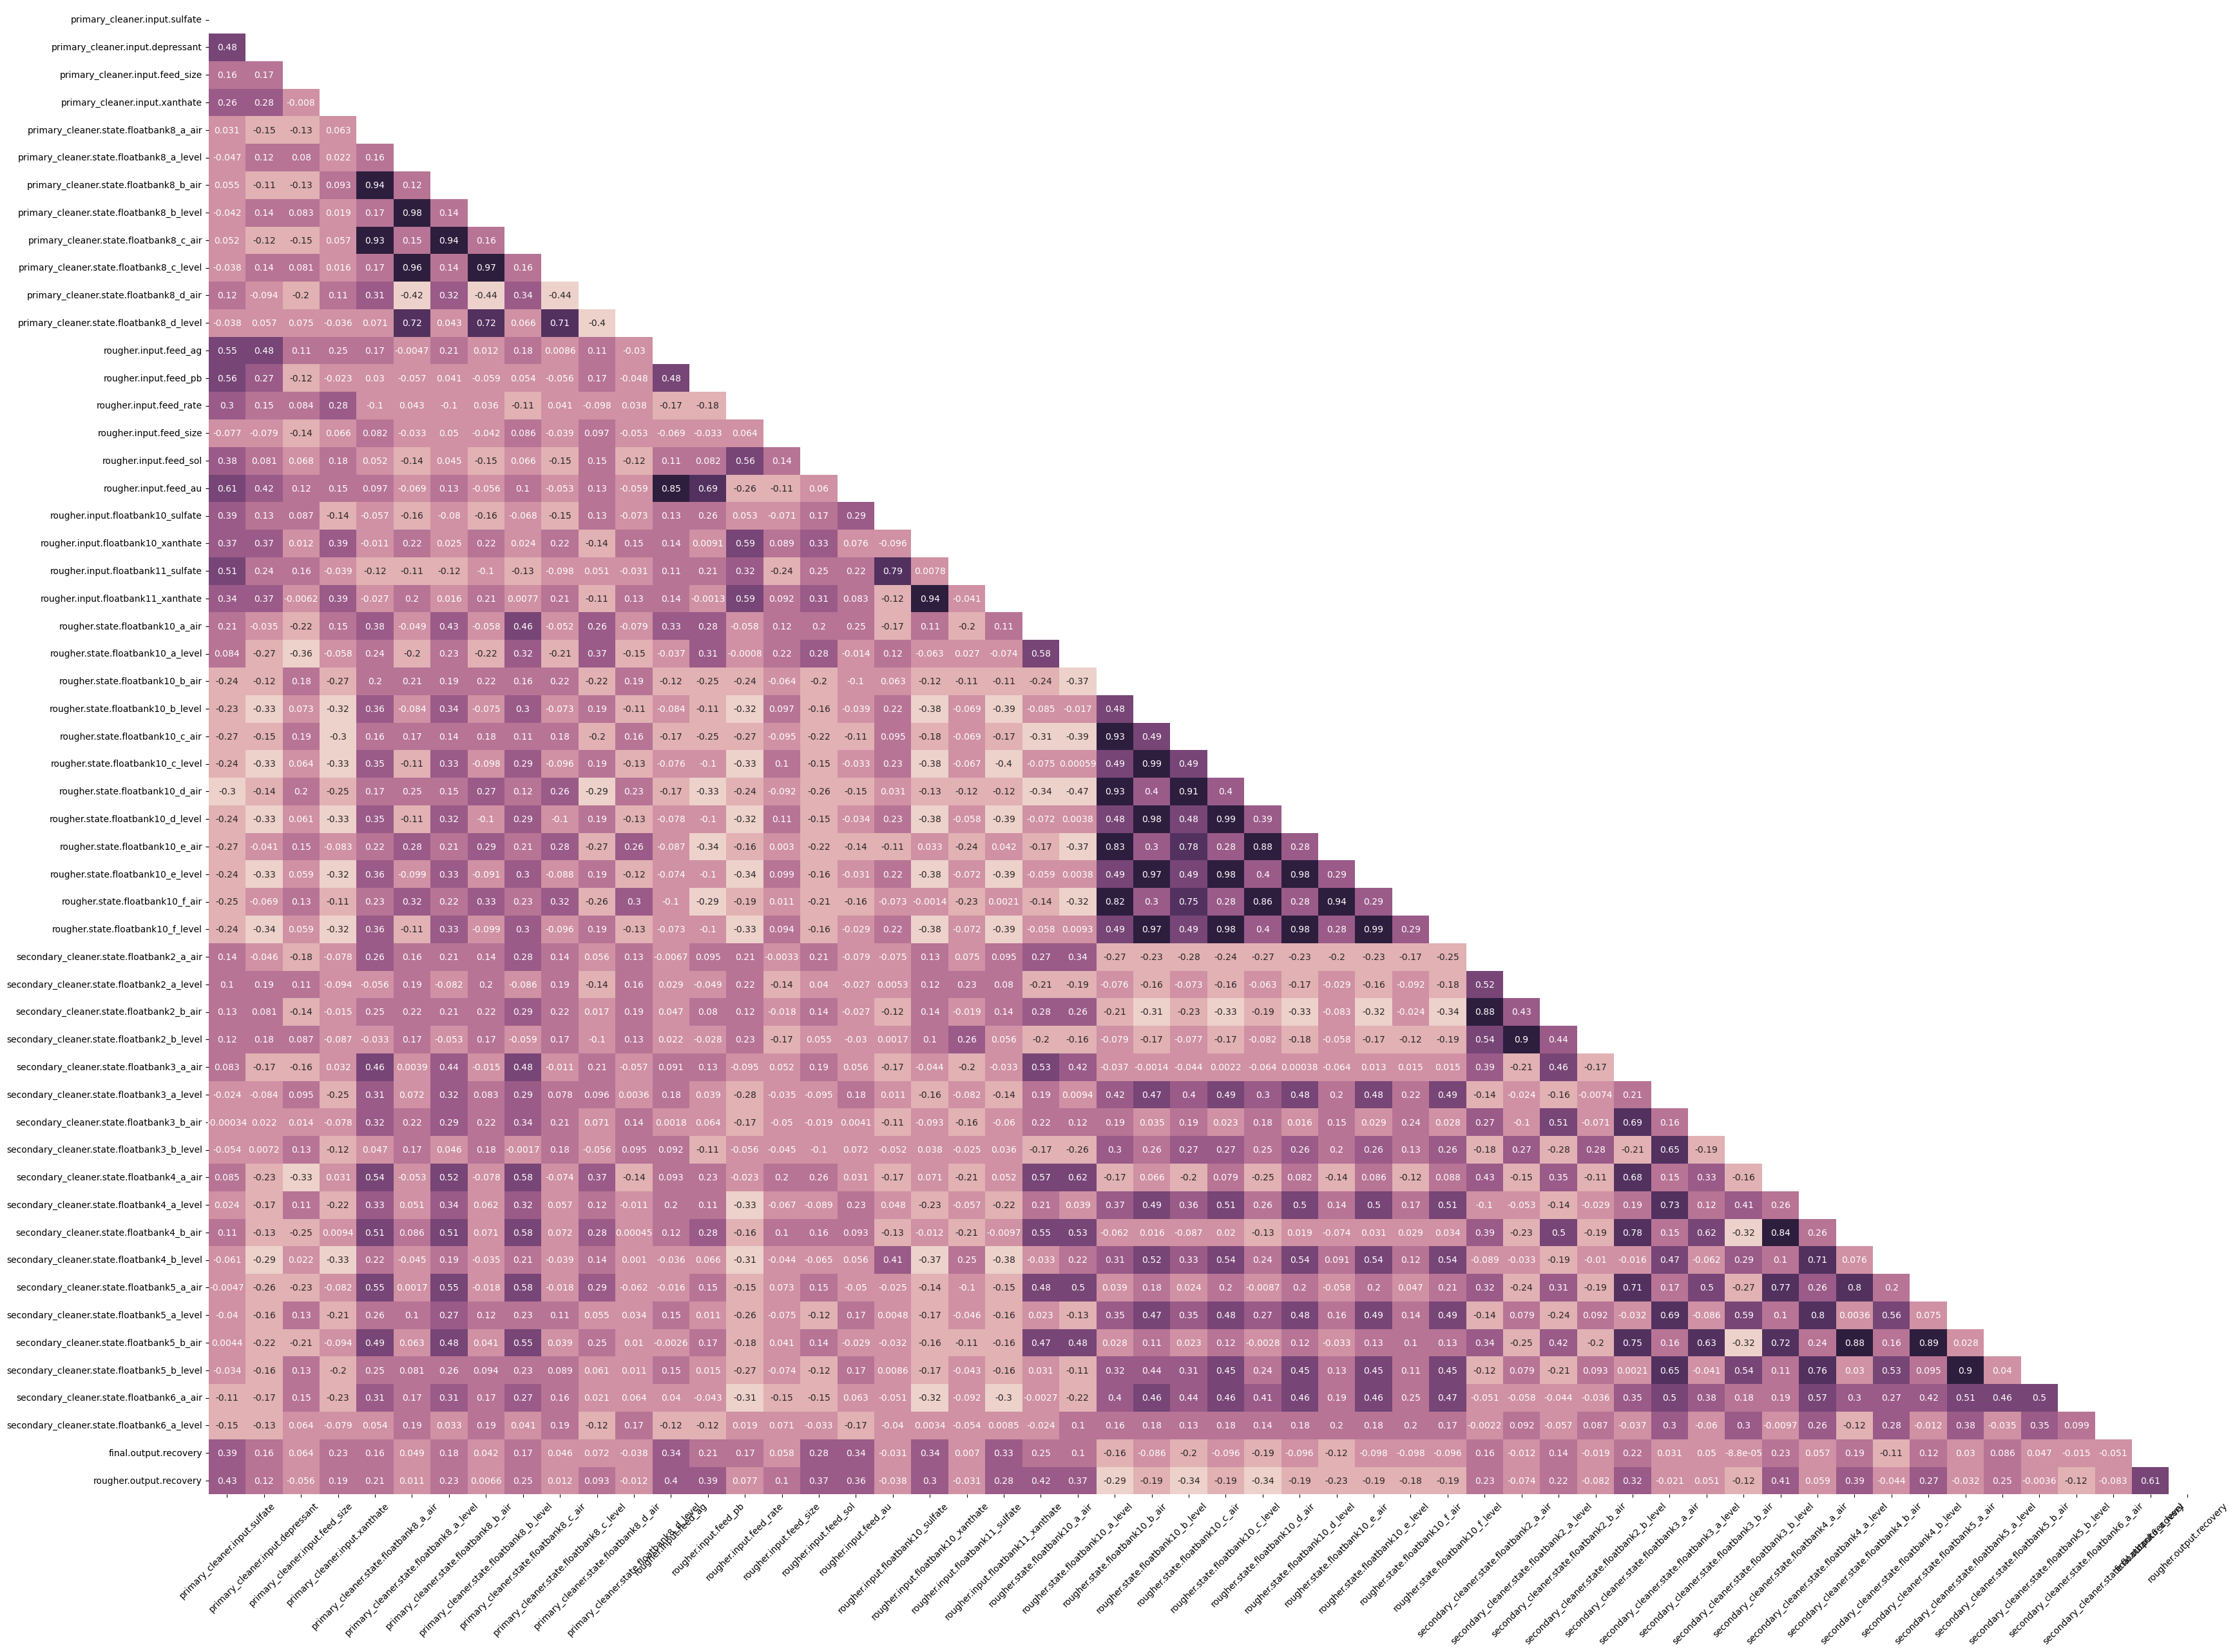

In [114]:
plt.rcParams['figure.figsize'] = (40,30)

# верхний треугольник корреляционной матриццы
matrix = np.triu(data_train.corr())

sns.heatmap(data_train.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix)
plt.xticks(rotation=45);

Наблюдается мультиколлинеарность. Некоторые признаки сильно коррелированы

In [115]:
data_train_knn = data_train
data_test_knn = data_test
data_train_knn = data_train_knn.ffill()
data_test_knn = data_test_knn.ffill()

In [116]:
num_features = data_train_knn.loc[:, ~data_train_knn.columns.isin(['date'])].columns

KNNImputer показал результаты хуже, чем ffil. Было замечено, что распределение гранул сырья на входе первого этапа очистки тренеровочной выборки сильно сдвинулось относительно тестовой выборки при заполнении KNNImputer. При заполнении ffil такой аномалии не происходит. 

In [117]:
data_train_knn.isna().sum(), data_train_knn.shape

(date                                          0
 primary_cleaner.input.sulfate                 0
 primary_cleaner.input.depressant              0
 primary_cleaner.input.feed_size               0
 primary_cleaner.input.xanthate                0
 primary_cleaner.state.floatbank8_a_air        0
 primary_cleaner.state.floatbank8_a_level      0
 primary_cleaner.state.floatbank8_b_air        0
 primary_cleaner.state.floatbank8_b_level      0
 primary_cleaner.state.floatbank8_c_air        0
 primary_cleaner.state.floatbank8_c_level      0
 primary_cleaner.state.floatbank8_d_air        0
 primary_cleaner.state.floatbank8_d_level      0
 rougher.input.feed_ag                         0
 rougher.input.feed_pb                         0
 rougher.input.feed_rate                       0
 rougher.input.feed_size                       0
 rougher.input.feed_sol                        0
 rougher.input.feed_au                         0
 rougher.input.floatbank10_sulfate             0
 rougher.input.float

In [118]:
data_test_knn.isna().sum(), data_test_knn.shape

(date                                          0
 primary_cleaner.input.sulfate                 0
 primary_cleaner.input.depressant              0
 primary_cleaner.input.feed_size               0
 primary_cleaner.input.xanthate                0
 primary_cleaner.state.floatbank8_a_air        0
 primary_cleaner.state.floatbank8_a_level      0
 primary_cleaner.state.floatbank8_b_air        0
 primary_cleaner.state.floatbank8_b_level      0
 primary_cleaner.state.floatbank8_c_air        0
 primary_cleaner.state.floatbank8_c_level      0
 primary_cleaner.state.floatbank8_d_air        0
 primary_cleaner.state.floatbank8_d_level      0
 rougher.input.feed_ag                         0
 rougher.input.feed_pb                         0
 rougher.input.feed_rate                       0
 rougher.input.feed_size                       0
 rougher.input.feed_sol                        0
 rougher.input.feed_au                         0
 rougher.input.floatbank10_sulfate             0
 rougher.input.float

Посмотрим на выбросы и можно ли от них избавиться

<AxesSubplot:>

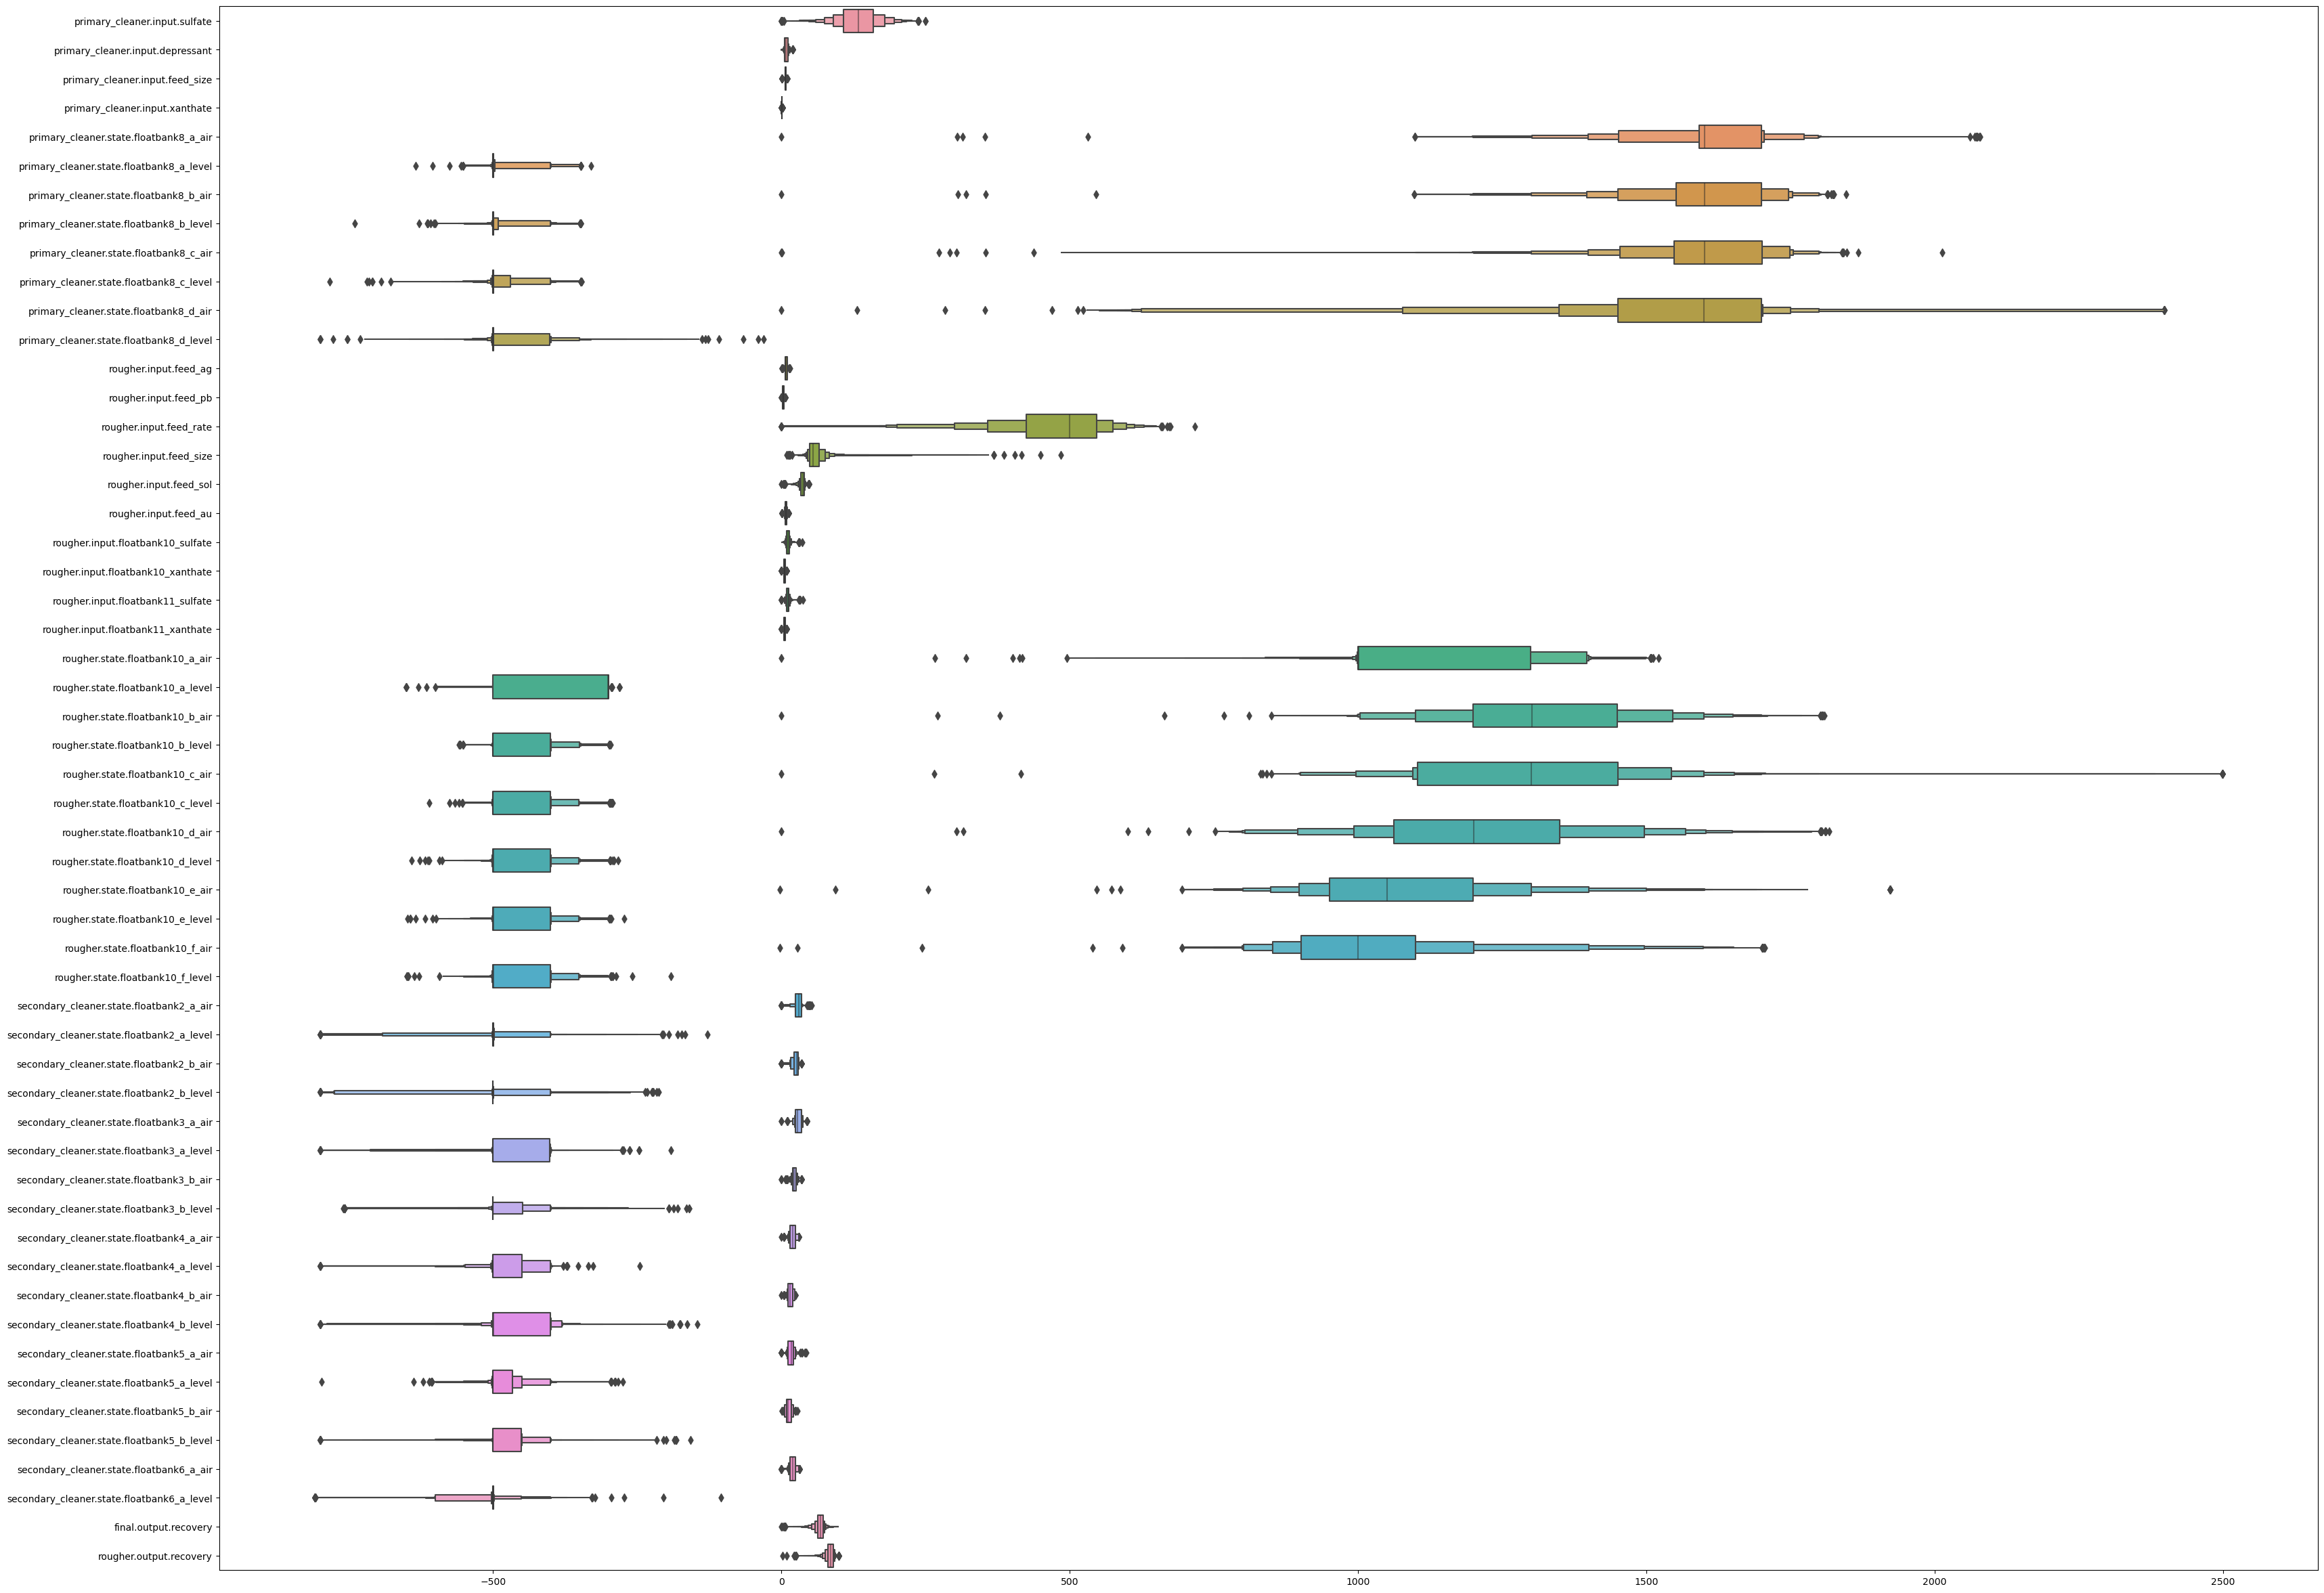

In [119]:
sns.boxenplot(data=data_train_knn, orient='h')

In [120]:
def outliers_remove(data):
    data_iqr = pd.DataFrame()
    for i in data[num_features]:        
        Q1 =  data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        data_iqr[i] = data[(data[i] > Q1-2*IQR ) &\
            (data[i] < Q3+2*IQR)][i]
    return data_iqr   

In [121]:
data_train_knn_iqr = outliers_remove(data_train_knn)

In [122]:
data_train_knn_iqr.isna().sum(), data_train_knn_iqr.dropna().shape

(primary_cleaner.input.sulfate                    0
 primary_cleaner.input.depressant                 0
 primary_cleaner.input.feed_size                 71
 primary_cleaner.input.xanthate                  19
 primary_cleaner.state.floatbank8_a_air         740
 primary_cleaner.state.floatbank8_a_level      2021
 primary_cleaner.state.floatbank8_b_air         349
 primary_cleaner.state.floatbank8_b_level      2188
 primary_cleaner.state.floatbank8_c_air         342
 primary_cleaner.state.floatbank8_c_level      2873
 primary_cleaner.state.floatbank8_d_air         988
 primary_cleaner.state.floatbank8_d_level      3364
 rougher.input.feed_ag                            2
 rougher.input.feed_pb                            1
 rougher.input.feed_rate                        185
 rougher.input.feed_size                        324
 rougher.input.feed_sol                         319
 rougher.input.feed_au                           12
 rougher.input.floatbank10_sulfate              114
 rougher.inp

<AxesSubplot:>

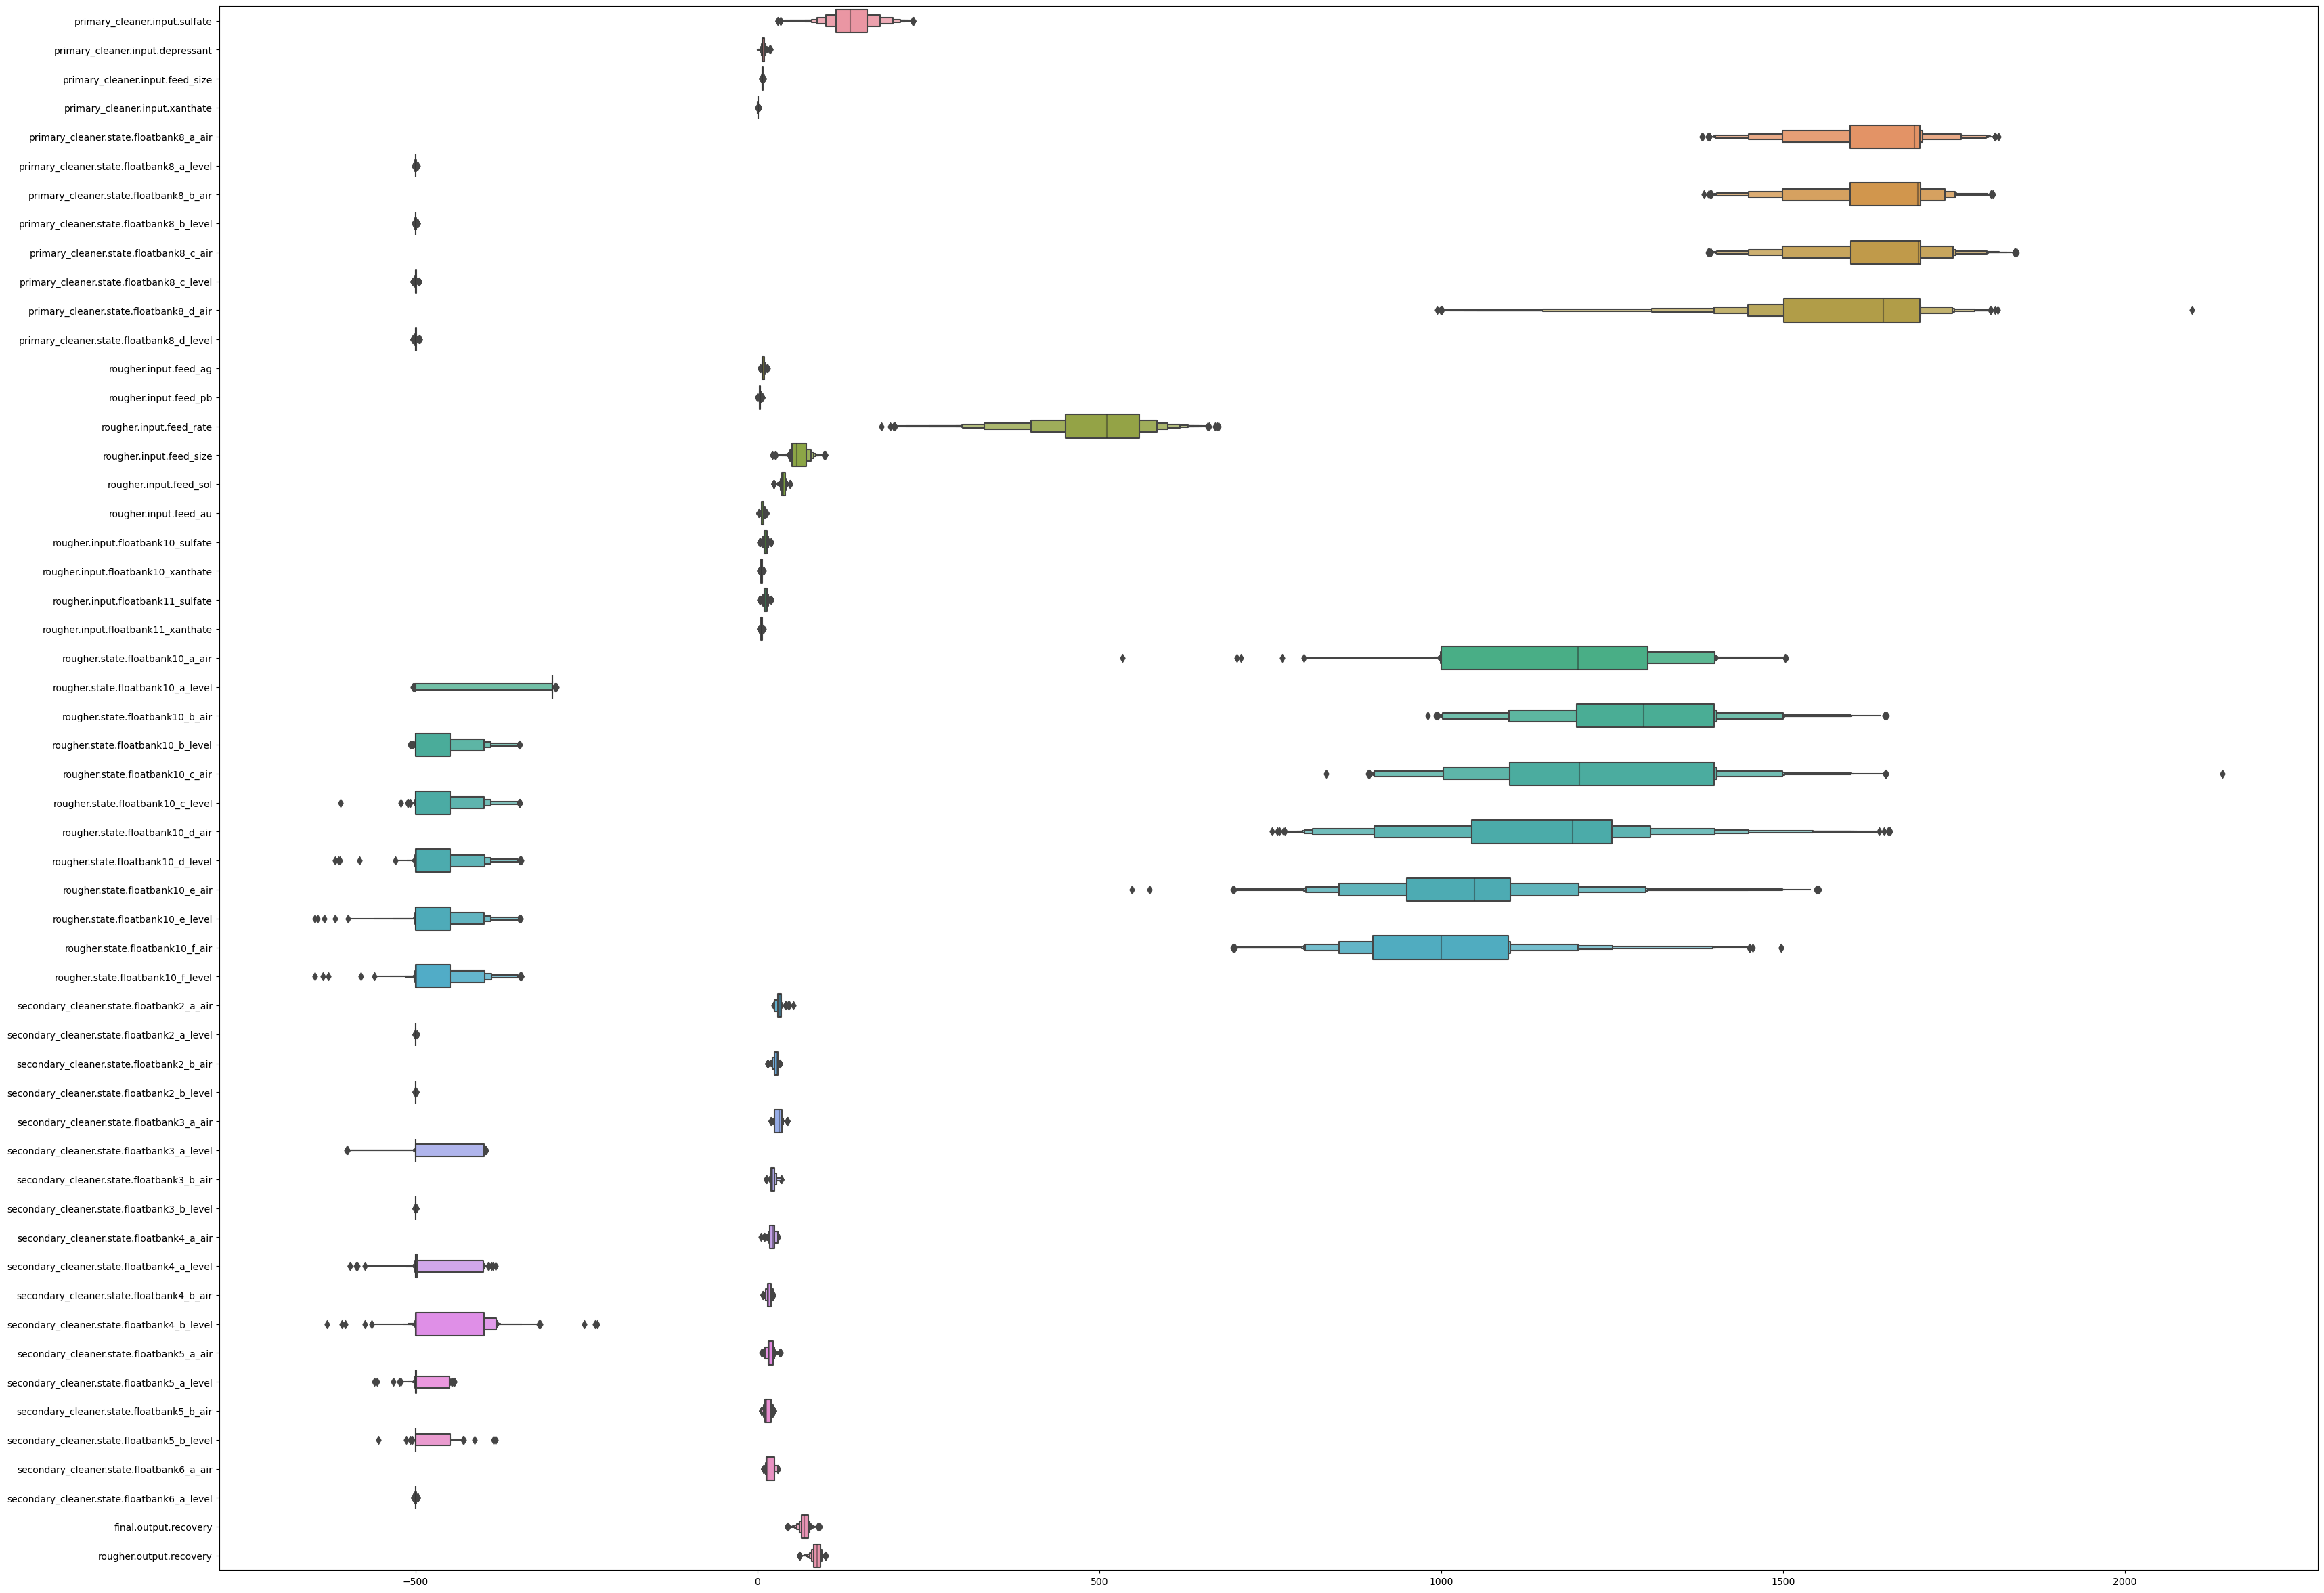

In [123]:
sns.boxenplot(data=data_train_knn_iqr.dropna(), orient='h')

In [124]:
data_train_knn_iqr = data_train_knn_iqr.dropna()

Пробовал обучить модель на данных без выбросов, итоговая sMAPE теста стала хуже. Будем тренировать модель на данных с выбросами.

#### Вывод:

Проверили, что эффективность обогащения MAE рассчитана правильно.

Удалили столбцы и калькуляции из тренеровочного датасета, которые отсутствуют в тестовой выборке. Их невозможно получить, либо замерить во время выполнения технологического процесса. Они так же являются утечкой данных.

Вытянули целевые признаки в тестовую выборку, по привязке к дате.

В ходе анализа данных выявились подозрительные, равные друг другу, околонулевые значения веществ. Избавились от этих записей.

! После удаления этиз выбросов, удалось достигнуть увеличения итоговой sMAPE на тестовой ввыборке

KNNImputer показал результаты хуже, чем ffil. Было замечено, что распределение гранул сырья на входе первого этапа очистки тренеровочной выборки сильно сдвинулось относительно тестовой выборки при заполнении KNNImputer. При заполнении ffil такой аномалии не происходит. 


Наблюдается мультиколлинеарность. Некоторые признаки сильно коррелированы

Была попытка избавиться от выбросов. При обучении модели на данных без выбросов, итоговая sMAPE теста стала хуже. 
Будем тренировать модель на данных с выбросами.

## Анализ данных

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

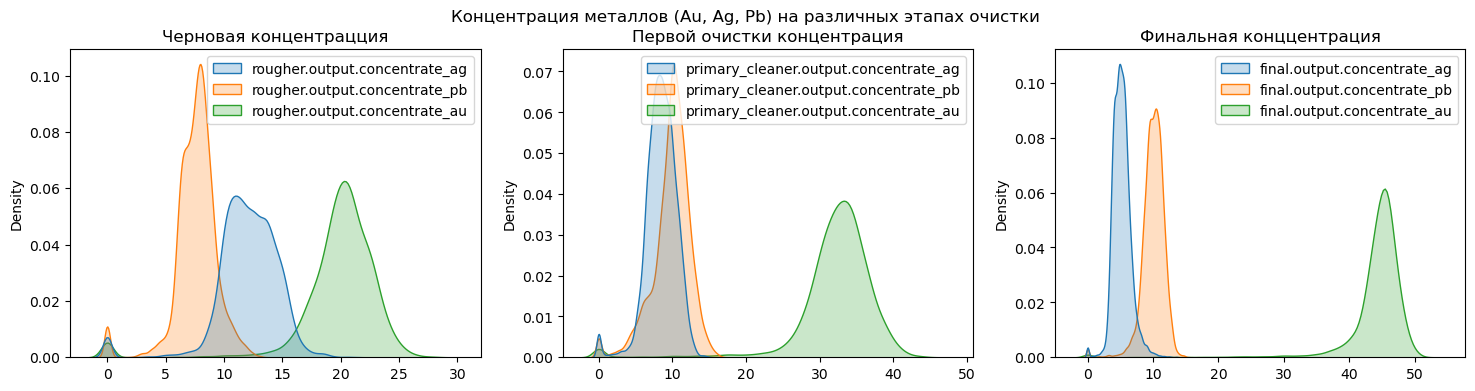

In [125]:
plt.rcParams['figure.figsize'] = (18,4)
fig, ax = plt.subplots(1,3)
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'rougher.output.concentrate' in x and 'sol' not in x]], ax=ax[0], shade=True)
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'primary_cleaner.output.concentrate' in x and 'sol' not in x]], ax=ax[1], shade=True)
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'final.output.concentrate' in x and 'sol' not in x]], ax=ax[2], shade=True)
ax[0].set_title('Черновая концентрацция'), ax[1].set_title('Первой очистки концентрация'), ax[2].set_title('Финальная конццентрация')
plt.suptitle ('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки')
fig.show()

Тут мы наблюдаем как концентрат обогощается золотом. Содержание свинца в концентрате сильно уменьшается. Содержание серебра так же уменьшается, но чуть в меньшей степени.

Наблюдаются странные выбросы около 0. Проверим на суммарном распределении металлов

2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

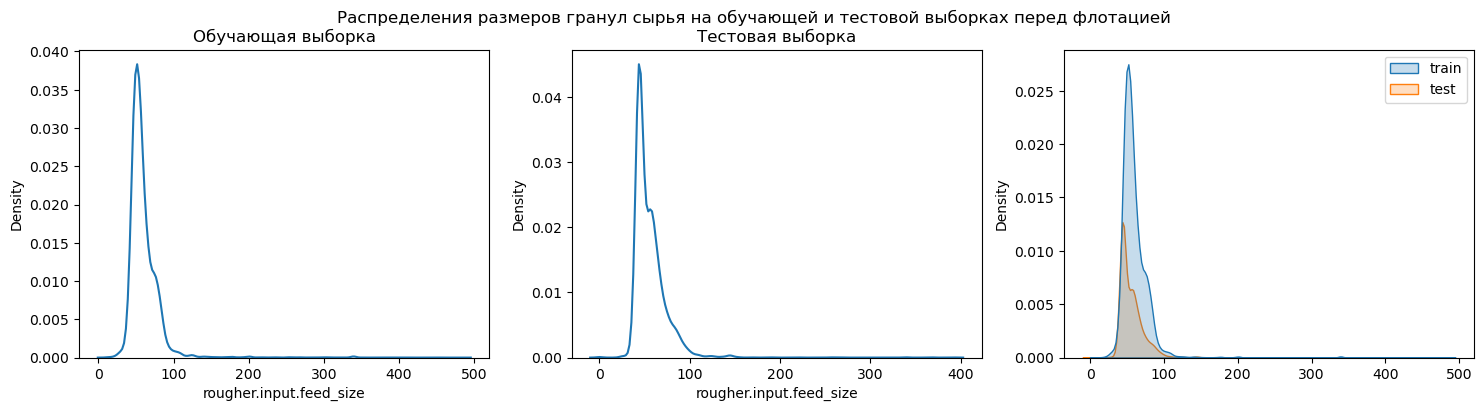

In [126]:
plt.rcParams['figure.figsize'] = (18,4)
fig, ax = plt.subplots(1,3)
sns.kdeplot(data=data_train_knn['rougher.input.feed_size'], ax=ax[0])
sns.kdeplot(data=data_test_knn['rougher.input.feed_size'], ax=ax[1])
sns.kdeplot(data={"train": data_train['rougher.input.feed_size'], "test": data_test['rougher.input.feed_size']}, ax=ax[2], shade=True)
ax[0].set_title('Обучающая выборка'), ax[1].set_title('Тестовая выборка')
plt.suptitle ('Распределения размеров гранул сырья на обучающей и тестовой выборках перед флотацией')
fig.show()

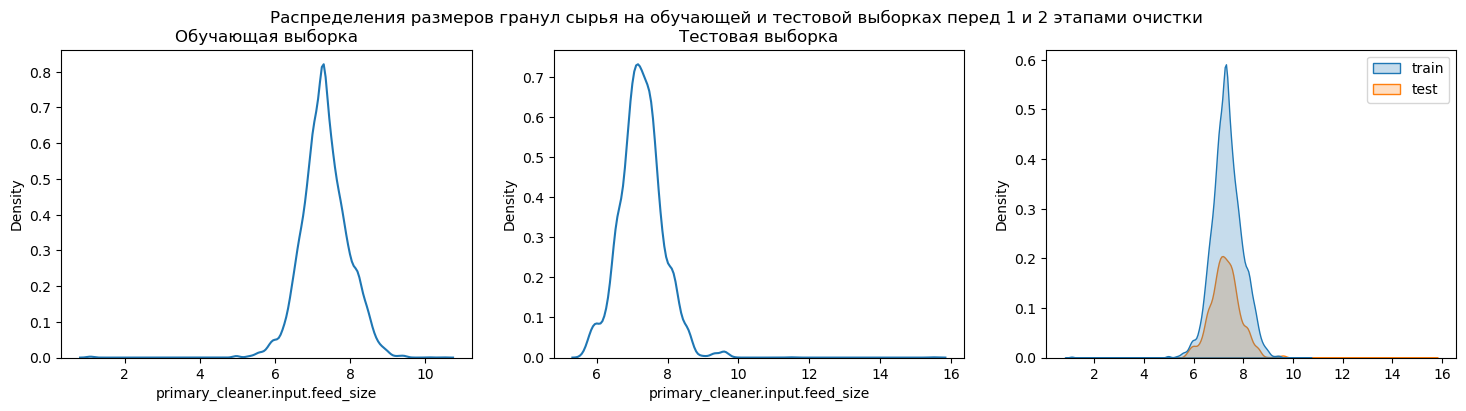

In [127]:
plt.rcParams['figure.figsize'] = (18,4)
fig, ax = plt.subplots(1,3)
sns.kdeplot(data=data_train_knn['primary_cleaner.input.feed_size'], ax=ax[0])
sns.kdeplot(data=data_test_knn['primary_cleaner.input.feed_size'], ax=ax[1])
sns.kdeplot(data={"train": data_train_knn['primary_cleaner.input.feed_size'], "test": data_test_knn['primary_cleaner.input.feed_size']}, ax=ax[2], shade=True)
ax[0].set_title('Обучающая выборка'), ax[1].set_title('Тестовая выборка')
plt.suptitle ('Распределения размеров гранул сырья на обучающей и тестовой выборках перед 1 и 2 этапами очистки')
fig.show()

Вид распределений размеров гранул сырья похож на обучающей и тестовой выборках, и большинство записей лежат в одном диапазоне. Средние, разброс и СКО отличаются не сильно.

Если мы обучим модель, на записях где признак в одном диапазоне лежит, а в тестовой в другом, то модель на тесте может дать плохую метрику. С размером гранул все ОК, проверим все признаки.

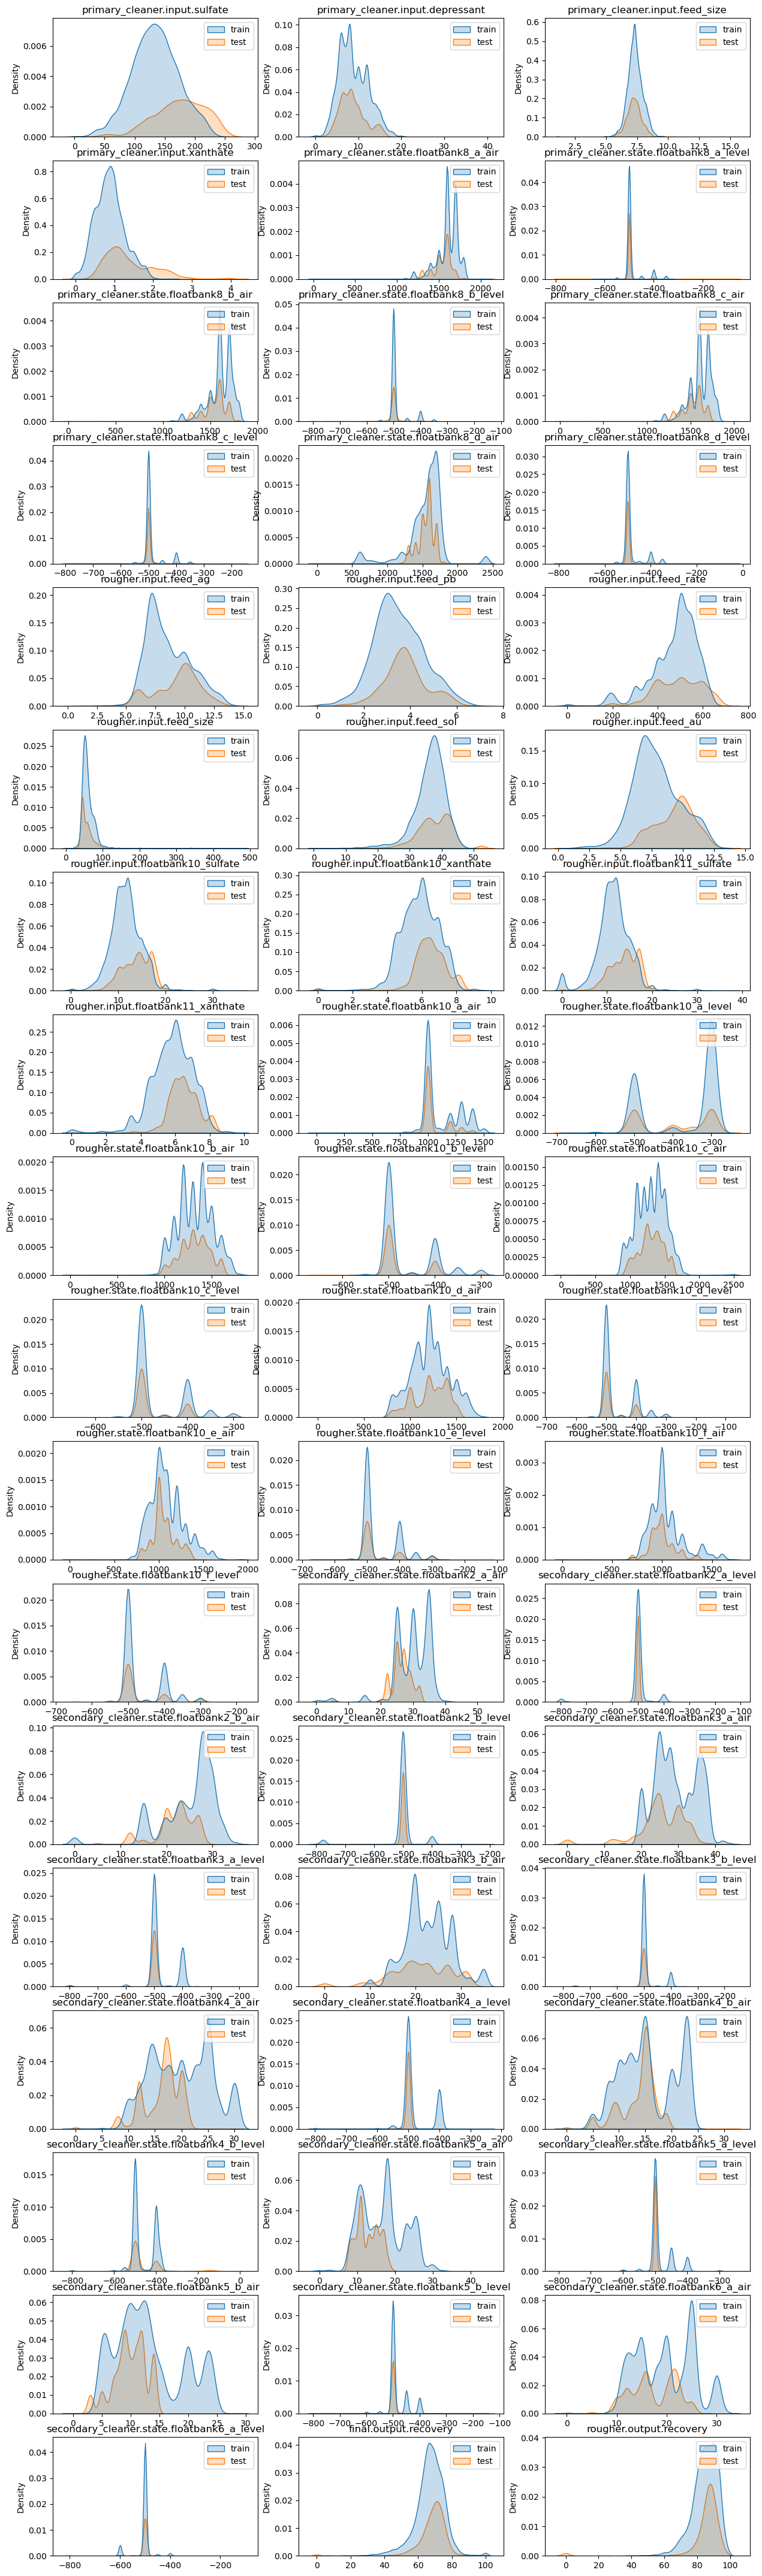

In [128]:
plt.figure(figsize=(15,55))
for i in enumerate(data_train_knn.select_dtypes([np.int, np.float]).columns):
    plt.subplot(18, 3, i[0] + 1)
    sns.kdeplot(data={"train": data_train_knn[i[1]], "test": data_test_knn[i[1]]}, shade=True)
    plt.title(i[1])    

In [129]:
# попробуем удалить несовпадающие признаки
# data_train_knn = data_train_knn.drop(['primary_cleaner.input.sulfate', 'primary_cleaner.input.xanthate'], axis=1)
# data_test_knn = data_test_knn.drop(['primary_cleaner.input.sulfate', 'primary_cleaner.input.xanthate'], axis=1)
# удаление негативно повлияло на качество

Тут пробовал удалять признаки, наиболее расходящиеся между тренеровочной и тестовой выборкой. Итоговое sMAPE на тестовой выборке стало хуже.

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

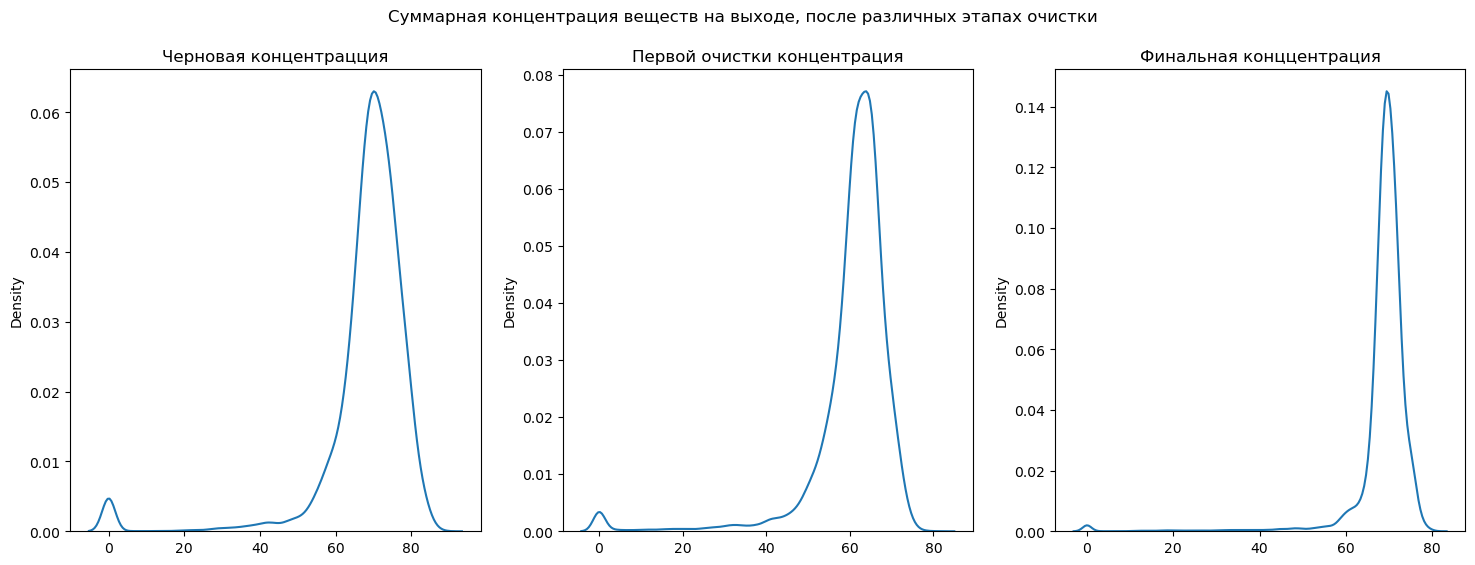

In [130]:
plt.rcParams['figure.figsize'] = (18,6)
fig, ax = plt.subplots(1,3)
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'rougher.output.concentrate' in x]].sum(axis=1), ax=ax[0])
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'primary_cleaner.output.concentrate' in x]].sum(axis=1), ax=ax[1])
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'final.output.concentrate' in x]].sum(axis=1), ax=ax[2])
ax[0].set_title('Черновая концентрацция'), ax[1].set_title('Первой очистки концентрация'), ax[2].set_title('Финальная конццентрация')
plt.suptitle ('Суммарная концентрация веществ на выходе после различных этапах очистки ')
fig.show()

На графике явно видно что присутствуют суммарные значения концентраций веществ в руде, равные 0. Скорее всего, это суммарные аномалии, вызванные неточностью измерений, которые были удалены из тренировочной выборки.

#### Вывод: 
Концентрация металлов (Au, Ag, Pb) в исходноем сырье:
Наблюдается бимодальное распределение, возможно, руда поступает из разнах источников

Концентрация металлов (Au, Ag, Pb) на различных этапах очистки:
Наблюдаетя, как концентрат обогощается золотом по мере прохождения этапов очистки. Содержание свинца в концентрате сильно уменьшается. Содержание серебра так же уменьшается, но чуть в меньшей степени.
Наблюдаются странные нулевые значения конццентраций металлов

Вид распределений размеров гранул сырья похож на обучающей и тестовой выборках, и большинство записей лежат в одном диапазоне. Средние, разброс и СКО отличаются не сильно.

Суммарная концентрация веществ на различных этапах очистки:
На графике явно видно что присутствуют суммарные значения концентраций веществ в руде, равные 0. Скорее всего, это суммарные аномалии, вызванные неточностью измерений, которые были удалены из тренировочной выборки.

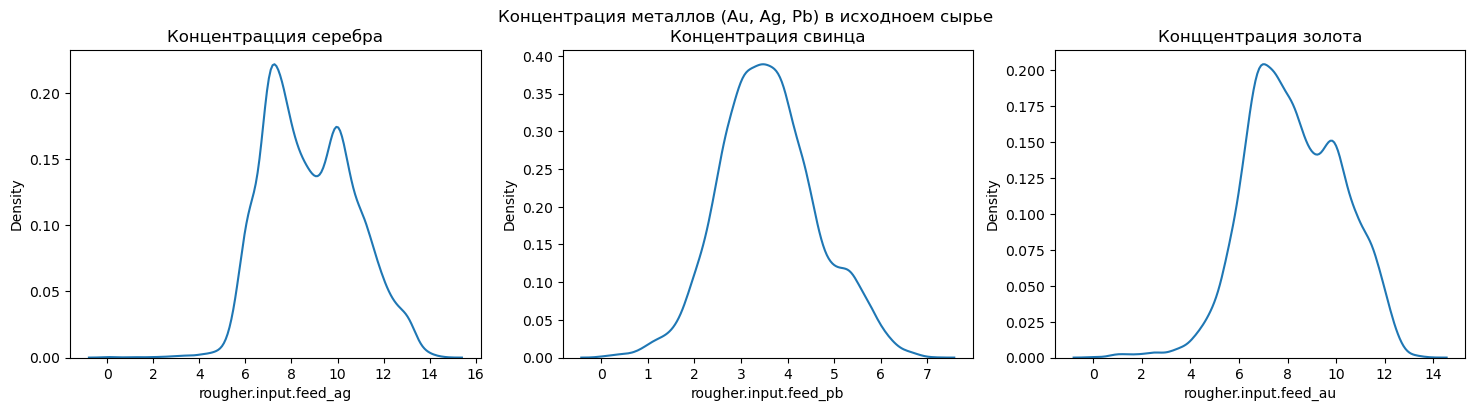

In [131]:
plt.rcParams['figure.figsize'] = (18,4)
fig, ax = plt.subplots(1,3)
sns.kdeplot(data=data_full['rougher.input.feed_ag'], ax=ax[0])
sns.kdeplot(data=data_full['rougher.input.feed_pb'], ax=ax[1])
sns.kdeplot(data=data_full['rougher.input.feed_au'], ax=ax[2])
ax[0].set_title('Концентрацция серебра'), ax[1].set_title('Концентрация свинца'), ax[2].set_title('Конццентрация золота')
plt.suptitle ('Концентрация металлов (Au, Ag, Pb) в исходноем сырье')
fig.show()

Концентрация металлов (Au, Ag, Pb) в исходноем сырье:
Наблюдается бимодальное распределение, возможно, руда поступает из разнах источников

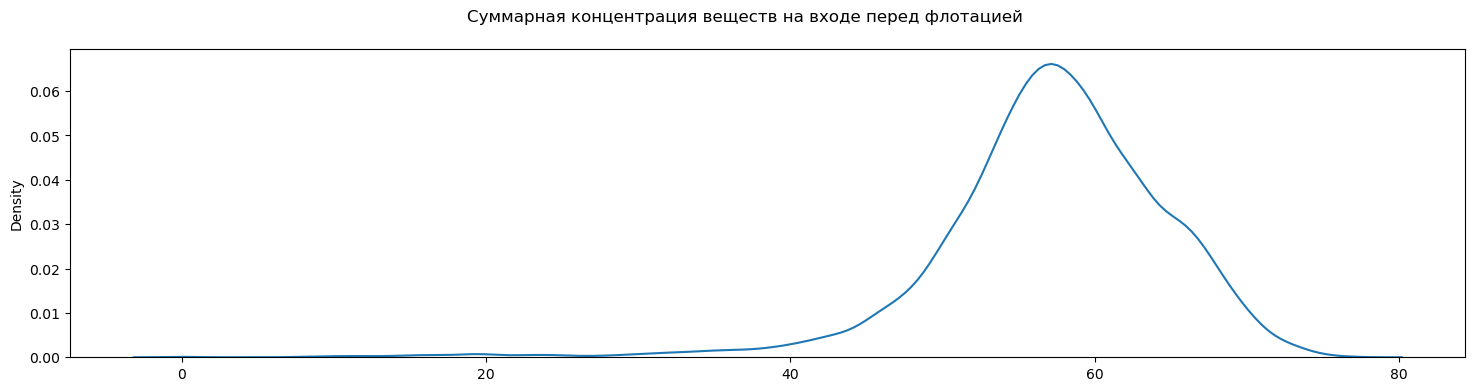

In [132]:
plt.rcParams['figure.figsize'] = (18,4)
sns.kdeplot(data=data_full[[x for x in data_full.columns if 'rougher.input.feed' in x and 'rate' not in x and 'size' not in x]].sum(axis=1))
plt.suptitle ('Суммарная концентрация веществ на входе перед флотацией')
fig.show()

In [133]:
data_full.loc[
              (data_full['rougher.input.feed_au'] == data_full['rougher.input.feed_ag']) &
              (data_full['rougher.input.feed_ag'] == data_full['rougher.input.feed_pb'])] 

date  final.output.concentrate_ag  \
16226  2018-03-12 02:59:59                     5.413548   
16227  2018-03-12 03:59:59                     5.413548   
16228  2018-03-12 04:59:59                     5.413548   
16229  2018-03-12 05:59:59                     5.413548   
16230  2018-03-12 06:59:59                     4.238007   

       final.output.concentrate_pb  final.output.concentrate_sol  \
16226                     9.389648                      8.731319   
16227                     9.389648                      8.731319   
16228                     9.389648                      8.731319   
16229                     9.389648                      8.731319   
16230                     7.349108                      6.833999   

       final.output.concentrate_au  final.output.recovery  \
16226                    45.270618                  100.0   
16227                    45.270618                  100.0   
16228                    45.270618                  100.0   
16229                    45.270618                  100.0   
16230                    35.424183                  100.0   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
16226                   0.0                   0.0                    0.0   
16227                   0.0                   0.0                    0.0   
16228                   0.0                   0.0                    0.0   
16229                   0.0                   0.0                    0.0   
16230                   0.0                   0.0                    0.0   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
16226                   0.0  ...                                 22.999183   
16227                   0.0  ...                                 22.985096   
16228                   0.0  ...                                 22.953466   
16229                   0.0  ...                                 22.953502   
16230                   0.0  ...                                 22.951054   

       secondary_cleaner.state.floatbank4_a_level  \
16226                                 -503.125579   
16227                                 -498.720702   
16228                                 -499.747605   
16229                                 -502.064254   
16230                                 -498.925902   

       secondary_cleaner.state.floatbank4_b_air  \
16226                                 14.941823   
16227                                 14.934058   
16228                                 14.926294   
16229                                 14.918529   
16230                                 14.910765   

       secondary_cleaner.state.floatbank4_b_level  \
16226                                 -500.352978   
16227                                 -499.661417   
16228                                 -500.058041   
16229                                 -500.135286   
16230                                 -499.608297   

       secondary_cleaner.state.floatbank5_a_air  \
16226                                 17.987796   
16227                                 17.998973   
16228                                 18.055831   
16229                                 17.995171   
16230                                 17.954160   

       secondary_cleaner.state.floatbank5_a_level  \
16226                                 -500.438815   
16227                                 -500.156797   
16228                                 -500.061594   
16229                                 -500.481962   
16230                                 -499.576610   

       secondary_cleaner.state.floatbank5_b_air  \
16226                                 11.963555   
16227                                 12.035195   
16228                                 12.014652   
16229                                 11.988193   
16230                                 12.017173   

       secondary_cleaner.state.floatbank5_b_level  \
16226                             

In [134]:
data_train.loc[
              (data_full['rougher.input.feed_au'] == data_full['rougher.input.feed_ag']) &
              (data_full['rougher.input.feed_ag'] == data_full['rougher.input.feed_pb'])] 

Empty DataFrame
Columns: [date, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level, final.output.recovery, rougher.output.recovery]
Index: []

[0 rows x 55 columns]

Были обнаружены 5 записей, содерщащих аномалии в концентрации веществ на входе перед флотацией.    
Записи были удалены при очистке от аномалий в суммарной концентрации веществ на выходе, после различных этапах очистки

## Модель

In [135]:
scaler = MinMaxScaler()

In [74]:
target_final_data_train = data_train_knn['final.output.recovery']
target_rougher_data_train = data_train_knn['rougher.output.recovery']

target_final_data_test = data_test_knn['final.output.recovery']
target_rougher_data_test = data_test_knn['rougher.output.recovery']

In [ ]:
features_final_data_train = data_train_knn.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
features_final_data_train[features_final_data_train.columns] = scaler.fit_transform(features_final_data_train[features_final_data_train.columns])
features_rougher_data_train = features_final_data_train[[x for x in features_final_data_train.columns if 'rougher' in x]]

In [ ]:
features_final_data_test = data_test_knn.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
features_final_data_test[features_final_data_test.columns] = scaler.transform(features_final_data_test[features_final_data_test.columns])
features_rougher_data_test = features_final_data_test[[x for x in features_final_data_test.columns if 'rougher' in x]]

проверим корреляццию признаков

In [ ]:
plt.rcParams['figure.figsize'] = (40,30)

# верхний треугольник корреляционной матриццы
matrix = np.triu(features_rougher_data_train.corr())

sns.heatmap(features_rougher_data_train.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix)
plt.xticks(rotation=45);

Наблюдается очень сильная корреляция некоторых признаков, будем выбирать лучшие и избавляться от мультиколлинеарности

In [ ]:
# функции для выбора лучших признаков и борьбы с мультиколлинеарностью
def get_scores(dataset, target, rnd_state=1234):
    """Returns features scores.

    Parameters
    ----------
    dataset: pd.DataFrame. Dataset with all data.
    target: array. Ground truth of target.
    rnd_state: integer. Random state.

    Returns
    -------
    scores: dictionary. Features and their scores.
    """

    scores = dict()

    for feature in dataset.columns:
        mask = ~dataset[feature].isna()
        X = dataset[mask][[feature]]
        y = target[mask]
        discr_fts_mask = X.dtypes.values == 'int64'

        score = mutual_info_regression(
            X=X,
            y=y,
            discrete_features=discr_fts_mask,
            n_neighbors=5,
            random_state=rnd_state
        )
        scores[feature] = score[0]

    return scores
def get_noncollinear_fts(dataset, target, trsh=0.8, mode="all", random_seed=1234, verbose=True):
    """Returns maximum linearly independent subset of features by threshold.

    Parameters
    ----------
    dataset: pd.DataFrame. Dataset with all data.
    target: array. Ground truth of target.
    trsh: float. threshold of correlation.  
    mode: string. 'all' returns all sets 'max' returns max set
    random_seed: integer. Random state.
    verbose: bool. Print steps or not

    Returns
    -------
    answer: dictionary. key - length of set, value - features and total score
    G: graph
    """

    t0 = perf_counter()

    # 1. MI calculation
    if verbose:
        print(f"=> mutual info calculation...")
    t1 = perf_counter()
    scores = get_scores(dataset, target, random_seed)
    if verbose:
        print(f"Task completed in: {timedelta(seconds=(perf_counter()-t1))}\n")

    # 2. Correlation matrix calculation
    if verbose:
        print(f"=> corr_matrix calculation...")
    t1 = perf_counter()
    corr_matrix = dataset.corr().abs()
    fts = corr_matrix.columns
    corr_matrix = np.array(corr_matrix)
    if verbose:
        print(f"Task completed in: {timedelta(seconds=(perf_counter()-t1))}\n")

    # 3. Graph assembling
    if verbose:
        print(f"=> graph assembling...")
    t1 = perf_counter()
    # Fill diagonal elements by 2. That value is greater than trashold
    np.fill_diagonal(corr_matrix, 2)
    corr_matrix = pd.DataFrame(corr_matrix, columns=fts, index=fts)
    graph_matrix = corr_matrix[abs(corr_matrix) > trsh]
    # High-correlated vertices does not connect by edge
    graph_matrix[~graph_matrix.isna()] = 0
    # Other vertices connect by edges
    graph_matrix.fillna(1, inplace=True)
    G = nx.from_numpy_array(np.array(graph_matrix))
    G = nx.relabel_nodes(G, dict(zip(list(G.nodes), fts)))
    if verbose:
        print(f"Task completed in: {timedelta(seconds=(perf_counter()-t1))}\n")

    # 4. Qliques search
    if verbose:
        print(f"=> qliques search...")
    t1 = perf_counter()
    clq = nx.find_cliques(G)
    cliques = list(clq)
    if verbose:
        print(f"{len(cliques)} qliques are found:\n")
    lens = np.array(list(map(len, cliques)))  # size of cliques
    stat = pd.Series(lens).value_counts()  # qliques distribution by size
    if verbose:
        print(stat)
    if verbose:
        print(f"Task completed in: {timedelta(seconds=(perf_counter()-t1))}\n")

    # 5. Optimal qlique search
    if verbose:
        print(f"=> best cliques search...")
    t1 = perf_counter()
    answer = {}
    if mode == "all":
        iter_list = sorted(np.array(stat.index))
    elif mode == "max":
        iter_list = [np.array(stat.index).max()]
    for val in iter_list:
        if verbose:
            print(f"Search best clique for dim = {val}")
        max_curr = -1e5
        fts_list = []
        for idx in np.argwhere(lens == val).ravel():
            summa = 0
            for col in cliques[idx]:
                summa += scores[col]
            if summa > max_curr:
                max_curr = summa
                fts_list = cliques[idx]
        answer[val] = (fts_list, max_curr)
    if verbose:
        print(f"Task completed in: {timedelta(seconds=(perf_counter()-t1))}\n")
    print(f"All tasks completed in: {timedelta(seconds=(perf_counter()-t0))}")

    return answer, G

In [ ]:
# Поиск максимальных клик для features_rougher_data_train
qlq_list, G = get_noncollinear_fts(
    features_rougher_data_train, target_rougher_data_train, trsh=0.65, mode="all", verbose=True)

In [ ]:
# rougher train
features_rougher_data_train_qlq = features_rougher_data_train
# rougher test
features_rougher_data_test_qlq = features_rougher_data_test

Посмотрим на корреляцию выбранных признакова для features_rougher_data_train_qlq

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)

# верхний треугольник корреляционной матриццы
matrix = np.triu(features_rougher_data_train_qlq.corr())

sns.heatmap(features_rougher_data_train_qlq.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix)
plt.xticks(rotation=45);

In [ ]:
# Поиск максимальных клик для features_final_data_train
qlq_list, G = get_noncollinear_fts(
    features_final_data_train, target_final_data_train, trsh=0.65, mode="all", verbose=True)

Мы попытались решить проблему мультиколлинеарности, но, это привело к ухудшению значения sMAPE. Поэтому мы решили оставить все признаки для обучения.

In [ ]:
# final train
features_final_data_train_qlq = features_final_data_train
# final test
features_final_data_test_qlq = features_final_data_test

In [ ]:
# # избавляемся от мультиколлинеарности
# # final train
# features_final_data_train_qlq = features_final_data_train[qlq_list[27][0]]
# # final test
# features_final_data_test_qlq = features_final_data_test[qlq_list[27][0]]

Посмотрим на корреляцию выбранных признакова для features_final_data_train_qlq

In [ ]:
plt.rcParams['figure.figsize'] = (20,12)

# верхний треугольник корреляционной матриццы
matrix = np.triu(features_final_data_train_qlq.corr())

sns.heatmap(features_final_data_train_qlq.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix)
plt.xticks(rotation=45);

Функцция расчета sMAPE

In [ ]:
#Функция расчета невзвешанной sMAPE
def smape (target, predictions):
    result = np.mean(100 * (2 * np.abs(target-predictions)) / (np.abs(target) + np.abs(predictions)))
    return result

In [ ]:
#Функция расчета итогового sMAPE
def result_smape(rougrher_smape, final_smape):
    return .25 * rougrher_smape + .75 * final_smape

In [ ]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

In [ ]:
parameters_random_forest = {
    'n_estimators': [540],
    'max_depth': [16],
    'max_features': [9]
}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
%%time
# Условия поиска
search_rf_rougher = GridSearchCV(rf, parameters_random_forest, scoring=smape_scorer, cv=cv, n_jobs=-1, verbose=2)
# Подбор гиперпараметров
search_rf_rougher.fit(features_rougher_data_train_qlq, target_rougher_data_train)

In [ ]:
rougrher_smape_train_rf = search_rf_rougher.best_score_
print('Лучшая оцценка sMAPE: %s' % rougrher_smape_train_rf)
print('Лучшие гиперпараметры: %s' % search_rf_rougher.best_params_)

In [ ]:
%%time
# Условия поиска
search_rf_final = GridSearchCV(rf, parameters_random_forest, scoring=smape_scorer, cv=cv, n_jobs=-1, verbose=2)
# Подбор гиперпараметров
search_rf_final.fit(features_final_data_train_qlq, target_final_data_train)

In [ ]:
final_smape_train_rf = search_rf_final.best_score_
print('Лучшая оцценка sMAPE: %s' % final_smape_train_rf)
print('Лучшие гиперпараметры: %s' % search_rf_final.best_params_)

In [ ]:
model_ridge = Ridge()

In [ ]:
parameters_ridge = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

In [ ]:
%%time
# Условия поиска
search_ridge = GridSearchCV(model_ridge, parameters_ridge, scoring=smape_scorer, n_jobs=-1, cv=cv)
# Подбор гиперпараметров
search_ridge.fit(features_rougher_data_train_qlq, target_rougher_data_train)

In [ ]:
print('Лучшая оцценка sMAPE: %s' % search_ridge.best_score_)
print('Лучшие гиперпараметры: %s' % search_ridge.best_params_)

In [ ]:
%%time
# Условия поиска
search_ridge = GridSearchCV(model_ridge, parameters_ridge, scoring=smape_scorer, n_jobs=-1, cv=cv)
# Подбор гиперпараметров
search_ridge.fit(features_final_data_train_qlq, target_final_data_train)

In [ ]:
print('Лучшая оцценка sMAPE: %s' % search_ridge.best_score_)
print('Лучшие гиперпараметры: %s' % search_ridge.best_params_)

In [ ]:
parameters_gradient = {'criterion': ['mse'], 'learning_rate': [0.5], 'loss': ['huber'], 'max_features': ['auto']}

In [ ]:
search_gradient_rougher = GridSearchCV(GradientBoostingRegressor(), parameters_gradient, scoring=smape_scorer, cv=cv, n_jobs=-1, verbose=2)
search_gradient_rougher.fit(features_rougher_data_train_qlq, target_rougher_data_train)

In [ ]:
print('Лучшая оцценка sMAPE: %s' % search_gradient_rougher.best_score_)
print('Лучшие гиперпараметры: %s' % search_gradient_rougher.best_params_)

In [ ]:
search_gradient_final = GridSearchCV(GradientBoostingRegressor(), parameters_gradient, scoring=smape_scorer, cv=cv, n_jobs=-1, verbose=2)
search_gradient_final.fit(features_final_data_train_qlq, target_final_data_train)

In [ ]:
print('Лучшая оцценка sMAPE: %s' % search_gradient_final.best_score_)
print('Лучшие гиперпараметры: %s' % search_gradient_final.best_params_)

Обучим константнаую модель DummyRegressor.

In [ ]:
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(features_rougher_data_train_qlq, target_rougher_data_train)
dummy_reg_predict = dummy_reg.predict(features_rougher_data_test_qlq)
rougrher_smape_dummy = smape(target_rougher_data_test, dummy_reg_predict)

In [ ]:
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(features_final_data_train_qlq, target_final_data_train)
dummy_reg_predict = dummy_reg.predict(features_final_data_test_qlq)
final_smape_dummy = smape(target_final_data_test, dummy_reg_predict)

Константная модель DummyRegressor. Посмтрим, как она справляется с нашей задачей. 

In [ ]:
best_rf_predictions = search_rf_rougher.best_estimator_.predict(features_rougher_data_test_qlq)

rougrher_smape_rf =  smape(target_rougher_data_test, best_rf_predictions)
rougrher_smape_rf

In [ ]:
best_rf_predictions = search_rf_final.best_estimator_.predict(features_final_data_test_qlq)

final_smape_rf =  smape(target_final_data_test, best_rf_predictions)
final_smape_rf

In [ ]:
print('Итоговое sMAPE для DummyRegressor =', result_smape(rougrher_smape_dummy, final_smape_dummy))

Выбранная модель RandomForestRegressor:

In [ ]:
print('Итоговое sMAPE для RandomForestRegressor на тренеровочной выборке =', result_smape(rougrher_smape_train_rf, final_smape_train_rf))

In [ ]:
print('Итоговое sMAPE для RandomForestRegressor на тестовой выборке =', result_smape(rougrher_smape_rf, final_smape_rf))

Итоговое sMAPE для RandomForestRegressor на тестовой выборке = 8.858568421147506 без работы над мультиколлинеарностью, обученная на всех признаках

Итоговое sMAPE на тестовой выборке = 8.988490257505921 после удаления мультиколлинеарности

Итоговое sMAPE на тестовой выборке = 9.06808508528789 после удаления мультиколлинеарности и очисткаи датасета от выбросов

#### Вывод:

В процессе разработки проекта  предпринимались попытки улучшить финальную метрику.  
Положительно повлияло на метрику следующее:

* Удаление артефактов из тренеровочной выборки.
* Правильный подбор гиперпараметров.
* Выбор наилучшей модели при крос-валидации.

Попытки, которые отрицательно повлияли на метрику следующее:

* Была попытка избавиться от выбросов. При обучении модели на данных без выбросов, итоговая sMAPE теста стала хуже.     
* Избавление от некоторых признаков черновой очистки для набора признаков для прогнозирования финального коэффициент восстановления золота.
* Удаление некоторых признаков, распределения которых отличались наибольшим образом между тренеровочной и тестовой выборками. 
* Попытались избавиться от мультиколлинеарности, но это немного ухудшило sMAPE, поэтому, оставляем все признаки для обучения.


Для обучения модели использовали 2 разных набора признаков

Выбрали 3 модели для обучения - RandomForestRegressor(), Ridge(), GradientBoostingRegressor()

При обучении моделей использована кросс-валидация и поиск гиперпараметров   

Лучший результат показала модель RandomForestRegressor() при использовании GridSearchCV

Её итоговое sMAPE для RandomForestRegressor на тренеровочной выборке составило -4.927190570429951, а на тестовой выборке 8.858568421147506  

Была обучена и проверена константная модель DummyRegressor. Итоговое sMAPE для DummyRegressor составило 9.83177803432217    

Таким образом, наши обученные модели предсказывают коэффициент восстановления золота из золотосодержащей руды точнее, чем константная модель.
